<a href="https://colab.research.google.com/github/pranavsinghps1/Custom-dataset/blob/master/eda_ml_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid-19 Cough Audio Classification -- EDA 

In [ ]:
data <- read.csv("/content/metadata_compiled.csv")

In [ ]:
library("ggplot2")


In [ ]:
install.packages("hrbrthemes")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gdtools’


Warning message in install.packages("hrbrthemes"):
“installation of package ‘gdtools’ had non-zero exit status”
Warning message in install.packages("hrbrthemes"):
“installation of package ‘hrbrthemes’ had non-zero exit status”


In [ ]:
mine.heatmap <- ggplot(data = data, mapping = aes(x = fever_muscle_pain,y=respiratory_condition
                                                        ,fill=status)) +
  geom_tile()+ scale_fill_gradient(low="white", high="blue") +
  theme_ipsum()


ERROR: ignored

In [ ]:
mine.heatmap

In [ ]:
ggplot(data, aes(x=fever_muscle_pain, y=respiratory_condition, size = age, color=status)) +
    geom_point(alpha=0.9)+scale_size(range = c(.1, 40))

In [ ]:


library(tidyverse)

In [ ]:
data %>% filter(diagnosis_4=="COVID-19"& status=="COVID-19"&diagnosis_1=="COVID-19")

In [ ]:
unique(data$diagnosis_1)

In [ ]:
unique(data$diagnosis_2)

In [ ]:
unique(data$diagnosis_3)

In [ ]:
unique(data$diagnosis_4)

In [ ]:
p2 <- data %>%
  ggplot(aes(status, fill = status)) +
  geom_bar() +
  theme(legend.position = "none")
  p2

In [ ]:
p2 <- data %>%
  ggplot(aes(diagnosis_1, fill = diagnosis_1)) +
  geom_bar() +
  theme(legend.position = "none")
  p2

In [ ]:
summary(data)
dim(data)

We observe that there are 27,550 entries in the dataset with 50 columns, out of which 
cough_detected, SNR, age and lattitude-longitude are numeric in nature.
Two of the descriptive statistics for SNR are tending to Infinte, which needs to be modified as SNR is Signal and Noise and a very high indicates that the file is corrupted or wont provide any helpful information.

Respiratory condition, fever-muscle pain are Boolenain nature.

Gender and status are character based.

4 medical expertd also examine the given records and label them according to their diagnosis.
* Qulaity 
* Cough-type
* dyspnea
* wheezing
* stridor
* choking
* congestion
* nothing
* diagnosis
* severity





# Numeric Value Analysis: 

# 1.SNR

summary() and fivenums() behave differently because they have a different understanding of calculation, although the difference is not signifacnt, inorder to keep it same throughout -- we will follow the classicial definition used by summary().

In [ ]:
summary(data$SNR)

Clearly, the SNR has a lot of extremely large values, so its better to plot a Box plot to figureout outliers.


In [ ]:
IQR=summary(data$SNR)[5]-summary(data$SNR)[2]
IQR

In [ ]:
data_SNR_Fixed<-subset(data,(is.finite(data$SNR)))
summary(data_SNR_Fixed$SNR)
dim(data_SNR_Fixed)

In [ ]:
sd(data_SNR_Fixed$SNR)
summary(data_SNR_Fixed$SNR)[4]

In [ ]:
upper_limit=sum(summary(data_SNR_Fixed$SNR)[4],(3*sd(data_SNR_Fixed$SNR)))
upper_limit
lower_limit=sum(summary(data_SNR_Fixed$SNR)[4],-(3*sd(data_SNR_Fixed$SNR)))
lower_limit


In [ ]:
data_SNR_Fixed<-subset(data_SNR_Fixed,data_SNR_Fixed$SNR>(lower_limit)&data_SNR_Fixed$SNR<(upper_limit))
summary(data_SNR_Fixed$SNR)

+ '+' and sum behave differnly 

In [ ]:
hist(data$SNR)

In [ ]:
hist(data_SNR_Fixed$SNR)

In [ ]:
boxplot((data_SNR_Fixed$SNR),data=(data_SNR_Fixed$SNR))

As mentioned in the warning we see that there are infinite values and quite a few outliers, to adjust this variable, we will use a metric to root out all the outliers, so basically all values 1.5 times the IQR(inter-quartile range) less or more than the first and third quartile respectively will be treated as outliers and will be removed from our consideration.


In [ ]:
fivenum(meta$SNR)[2]

In [ ]:
IQR=fivenum(meta$SNR)[4]-fivenum(meta$SNR)[2]
IQR


In [ ]:
upper=fivenum(meta$SNR)[4]+(1.5*IQR)
upper


In [ ]:
meta2_<-subset(meta,SNR<(upper))
summary(meta2_)

# Outliers with IQR Method

In [ ]:
Q <- quantile(data_SNR_Fixed$SNR, probs=c(.25, .75), na.rm = FALSE)

In [ ]:
iqr <- IQR(data_SNR_Fixed$SNR)

In [ ]:
up <-  Q[2]+1.5*iqr # Upper Range  
low<- Q[1]-1.5*iqr # Lower Range﻿

In [ ]:
eliminated<- subset(data_SNR_Fixed, data_SNR_Fixed$SNR> (Q[1] - 1.5*iqr) & data_SNR_Fixed$SNR < (Q[2]+1.5*iqr))

In [ ]:
boxplot((eliminated$SNR),data=(eliminated))

In [ ]:
IQR=summary(meta$SNR)[5]-summary(meta$SNR)[2]
IQR

In [ ]:
#lower limit of outlier range-> Q1-1.5*IQR
lower=summary(meta$SNR)[2]-(1.5*IQR)
lower

In [ ]:
upper=summary(meta$SNR)[5]+(1.5*IQR)
upper


Since, we see that the minimum value is withing the bounds of lower bound, so only the upper bound needs to be implemented. 

In [ ]:
meta2<-subset(meta,SNR<(upper))
summary(meta2)

In [ ]:
count(meta2)

In [ ]:
boxplot(meta2$SNR,data=meta2)

In [ ]:
iqr_outlier_cuts <- fivenum(meta$SNR)[c(2,4)] + 
+       c(-1.5, 1.5)*diff(fivenum(meta$SNR)[c(2,4)])

In [ ]:
sum(meta$SNR < iqr_outlier_cuts[1] | 
+     meta$SNR > iqr_outlier_cuts[2])

In [ ]:
summary(meta)

# Gender Column


In [ ]:
dim(data_SNR_Fixed)

In [ ]:
table(data_SNR_Fixed$gender)

# Status Column

In [ ]:
table(data_SNR_Fixed$status)

In [ ]:
data_SNR_Fixed_Status_not_emp <- subset(data_SNR_Fixed, !status == "")

In [ ]:
table(data_SNR_Fixed_Status_not_emp$status)

In [ ]:
dim(data_SNR_Fixed_Status_not_emp)

In [ ]:
private_testing<-subset(data_SNR_Fixed, status == "")

In [ ]:
dim(private_testing)

In [ ]:
status_data<-table(data_SNR_Fixed_Status_not_emp$status)
barplot(status_data[order(status_data, decreasing = TRUE)])

# Train-Test Split

In [ ]:
summary(data_SNR_Fixed_Status_not_emp)
dim(data_SNR_Fixed_Status_not_emp)

In [ ]:
data_SNR_Fixed_Status_not_emp_data_only<-data_SNR_Fixed_Status_not_emp[c(1:11)]

In [ ]:
summary(data_SNR_Fixed_Status_not_emp_data_only)

In [ ]:
data_cleaned<-data_SNR_Fixed_Status_not_emp_data_only[c("cough_detected","SNR","gender","respiratory_condition","fever_muscle_pain","status")]

In [ ]:
summary(data_cleaned)

In [ ]:
data_cleaned<- data_SNR_Fixed_Status_not_emp_data_only[!row.has.na,]

In [ ]:
set.seed(43)

In [ ]:
smp_size <- floor(0.75 * nrow(data_cleaned))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(data_cleaned)), size = smp_size)

In [ ]:
train <- data_cleaned[train_ind, ]
test <- data_cleaned[-train_ind, ]

In [ ]:
dim(train)

In [ ]:
dim(test)

In [ ]:
summary(train)

In [ ]:
fit_rf<-randomForest(formula = status ~ .,
        data = train)

In [ ]:
m1 <- randomForest(
  formula = status ~ .,
  data    = train
)

In [ ]:
randomized=data_SNR_Fixed_Status_not_emp[sample(1:nrow(data_SNR_Fixed_Status_not_emp),nrow(data_SNR_Fixed_Status_not_emp)),]

In [ ]:
tridx=sample(1:nrow(data),0.7*nrow(data),replace=F)

In [ ]:
trdf=randomized[tridx,]

In [ ]:
tstdf=randomized[-tridx,]

# Running RF and Variable of Importance

In [ ]:
install.packages("randomForest")

In [ ]:
library(randomForest)

In [ ]:
require(caret)

In [ ]:
formstr="status~."

In [ ]:
tabel(trdf)

In [ ]:
trdf_RF=trdf

In [ ]:
trdf_RF$status=as.factor(trdf_RF$status)

In [ ]:
 RF_model=randomForest(status~.,trdf_RF)

In [ ]:
RF_model_VI=varImp(RF_model)

# New Section ML 

In [ ]:
data

uuid,datetime,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,⋯,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,⋯,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>
00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11-25T18:58:50.488301+00:00,0.0155,7.326171,48.9,2.4,NA,,NA,NA,⋯,,,NA,NA,NA,NA,NA,NA,,
00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,16.151433,31.3,34.8,15,male,FALSE,FALSE,⋯,,,NA,NA,NA,NA,NA,NA,,
0007c6f1-5441-40e6-9aaf-a761d8f2da3b,2020-10-18T15:38:38.205870+00:00,0.1643,16.217201,NA,NA,46,female,FALSE,FALSE,⋯,,,NA,NA,NA,NA,NA,NA,,
0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,20.146058,40.0,-75.1,34,male,TRUE,FALSE,⋯,,,NA,NA,NA,NA,NA,NA,,
0012c608-33d0-4ef7-bde3-75a0b1a0024e,2020-04-15T01:03:59.029326+00:00,0.0482,0.000000,-16.5,-71.5,NA,,NA,NA,⋯,,,NA,NA,NA,NA,NA,NA,,
001328dc-ea5d-4847-9ccf-c5aa2a3f2d0f,2020-04-13T22:23:06.997578+00:00,0.9968,13.146502,NA,NA,21,male,FALSE,FALSE,⋯,,,NA,NA,NA,NA,NA,NA,,
001c85a8-cc4d-4921-9297-848be52d4715,2020-04-17T15:24:35.822355+00:00,0.0735,23.014715,40.6,-3.6,NA,,NA,NA,⋯,,,NA,NA,NA,NA,NA,NA,,
001d8e33-a4af-4edb-98ba-b03f891d9a6c,2020-05-13T01:27:42.552773+00:00,0.0306,12.713480,13.8,-89.6,NA,female,FALSE,TRUE,⋯,,,NA,NA,NA,NA,NA,NA,,
001e2f19-d81c-4029-b33c-d2db56b23a4a,2020-10-18T15:11:02.106636+00:00,0.7811,12.566406,45.7,4.9,20,male,TRUE,FALSE,⋯,,,NA,NA,NA,NA,NA,NA,,


In [ ]:
summary(data)

     uuid             datetime         cough_detected        SNR        
 Length:27550       Length:27550       Min.   :0.0000   Min.   :-4.719  
 Class :character   Class :character   1st Qu.:0.2082   1st Qu.: 5.795  
 Mode  :character   Mode  :character   Median :0.8713   Median :12.121  
                                       Mean   :0.6495   Mean   :   Inf  
                                       3rd Qu.:0.9863   3rd Qu.:19.777  
                                       Max.   :1.0000   Max.   :   Inf  
                                                                        
    latitude        longitude             age           gender         
 Min.   :-54.80   Min.   :-158.100   Min.   :  1.0   Length:27550      
 1st Qu.: 33.70   1st Qu.:  -4.100   1st Qu.: 26.0   Class :character  
 Median : 40.90   Median :   6.400   Median : 35.0   Mode  :character  
 Mean   : 33.24   Mean   :   4.767   Mean   : 36.8                     
 3rd Qu.: 46.20   3rd Qu.:  30.500   3rd Qu.: 46.0      

In [ ]:
data
data[complete.cases(data),]

,uuid,datetime,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,⋯,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,⋯,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>
1656,0f8d80f9-700e-4069-924d-e15f29d7c19a,2020-04-13T16:08:55.122640+00:00,1,17.293571,41.1,71.2,16,female,FALSE,FALSE,⋯,good,wet,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,lower_infection,mild
1658,0f8fb3e0-1a30-4bd3-982a-24342a0bdc70,2020-04-18T11:18:02.278089+00:00,1,30.797658,40.8,72.4,17,female,FALSE,FALSE,⋯,good,dry,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,healthy_cough,pseudocough
3198,1dd3b212-e969-4ede-a9d9-f24b711e2028,2020-04-14T11:09:36.183531+00:00,1,6.813155,38.7,65.9,21,female,TRUE,TRUE,⋯,good,dry,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,upper_infection,severe
3309,1ed9491a-4036-4308-bc44-5036fc2e9f28,2020-04-09T19:21:15.315791+00:00,1,12.047627,46.7,5.6,55,male,FALSE,FALSE,⋯,good,dry,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,upper_infection,mild
3583,21aee478-6d13-45ea-be4d-4f29fd244798,2020-04-12T13:14:51.516887+00:00,1,19.832265,47.5,40.1,45,male,TRUE,TRUE,⋯,good,dry,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,upper_infection,mild
4380,29426ec2-55bf-4ce0-a591-bd7ea2dd9a6c,2020-04-13T15:18:35.607812+00:00,1,14.271239,40.9,69.9,22,female,TRUE,TRUE,⋯,good,unknown,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,lower_infection,mild
4915,2e4456dd-bb47-45f7-b2ef-7b2d2f2859c6,2020-04-18T18:14:09.678663+00:00,1,0.000000,40.5,70.9,20,male,TRUE,FALSE,⋯,good,dry,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,healthy_cough,pseudocough
5181,30b282bb-affd-4449-81b3-f5bcc8877bee,2020-04-13T19:09:18.232142+00:00,1,32.539556,40.9,29.2,46,male,FALSE,FALSE,⋯,ok,unknown,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,healthy_cough,unknown
5267,314cd5c3-0030-4ea1-83b3-d6845897b903,2020-04-11T19:31:57.256728+00:00,1,28.101864,57.1,-2.1,24,female,FALSE,FALSE,⋯,good,dry,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,lower_infection,unknown


In [ ]:
install.packages("sp")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("rworldxtra")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("rworldmap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(sp)
library(rworldmap)

# The single argument to this function, points, is a data.frame in which:
#   - column 1 contains the longitude in degrees
#   - column 2 contains the latitude in degrees
coords2country = function(points)
{  
  countriesSP <- getMap(resolution='high')
  #countriesSP <- getMap(resolution='high') #you could use high res map from rworldxtra if you were concerned about detail

  # convert our list of points to a SpatialPoints object

  # pointsSP = SpatialPoints(points, proj4string=CRS(" +proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs +towgs84=0,0,0"))

  #setting CRS directly to that from rworldmap
  pointsSP = SpatialPoints(points, proj4string=CRS(proj4string(countriesSP)))  


  # use 'over' to get indices of the Polygons object containing each point 
  indices = over(pointsSP, countriesSP)

  # return the ADMIN names of each country
  indices$ADMIN  
  #indices$ISO3 # returns the ISO3 code 
  #indices$continent   # returns the continent (6 continent model)
  #indices$REGION   # returns the continent (7 continent model)
}

In [ ]:
data_cord<-data[, c("latitude", "longitude")]

In [ ]:
ompleterecords <- na.omit(data_cord) 

In [ ]:
countries<-(coords2country(ompleterecords))

In [ ]:
(countries)

[1] <NA>                        <NA>                       
    [3] Antarctica                  <NA>                       
    [5] <NA>                        Antarctica                 
    [7] Somalia                     <NA>                       
    [9] Russia                      Somalia                    
   [11] Saudi Arabia                Russia                     
   [13] <NA>                        <NA>                       
   [15] <NA>                        Saudi Arabia               
   [17] Saudi Arabia                <NA>                       
   [19] <NA>                        <NA>                       
   [21] Saudi Arabia                Antarctica                 
   [23] Kenya                       Antarctica                 
   [25] Russia                      Somalia                    
   [27] <NA>                        <NA>                       
   [29] <NA>                        Antarctica                 
   [31] Russia                      <NA>                       
   [33] Iraq                        <NA>                       
   [35] Somalia                     United Republic of Tanzania
   [37] <NA>                        Ethiopia                   
   [39] Ethiopia                    Ethiopia                   
   [41] Saudi Arabia                Ukraine                    
   [43] <NA>                        <NA>                       
   [45] Antarctica                  Antarctica                 
   [47] Antarctica                  <NA>                       
   [49] Saudi Arabia                Ethiopia                   
   [51] Somaliland                  Somalia                    
   [53] <NA>                        Antarctica                 
   [55] <NA>                        Kenya                      
   [57] <NA>                        Somalia                    
   [59] <NA>                        <NA>                       
   [61] Somaliland                  Somaliland                 
   [63] Ethiopia                    <NA>                       
   [65] <NA>                        <NA>                       
   [67] <NA>                        <NA>                       
   [69] <NA>                        Saudi Arabia               
   [71] Russia                      <NA>                       
   [73] <NA>                        United Republic of Tanzania
   [75] <NA>                        <NA>                       
   [77] <NA>                        Nigeria                    
   [79] Somalia                     <NA>                       
   [81] <NA>                        Saudi Arabia               
   [83] <NA>                        <NA>                       
   [85] Somalia                     <NA>                       
   [87] <NA>                        Russia                     
   [89] <NA>                        Russia                     
   [91] Ethiopia                    <NA>                       
   [93] Saudi Arabia                <NA>                       
   [95] <NA>                        Ethiopia                   
   [97] Somalia                     <NA>                       
   [99] Antarctica                  Antarctica                 
  [101] Iran                        <NA>                       
  [103] Saudi Arabia                Iraq                       
  [105] Somaliland                  Somaliland                 
  [107] Somalia                     Antarctica                 
  [109] Egypt                       Russia                     
  [111] <NA>                        Saudi Arabia               
  [113] <NA>                        Antarctica                 
  [115] <NA>                        Ethiopia                   
  [117] Russia                      Russia                     
  [119] <NA>                        Ethiopia                   
  [121] Saudi Arabia                United Republic of Tanzania
  [123] Saudi Arabia                <NA>                       
  [125] Saudi Arabia                

In [ ]:
unique(countries)

[1] <NA>                        Antarctica                 
 [3] Somalia                     Russia                     
 [5] Saudi Arabia                Kenya                      
 [7] Iraq                        United Republic of Tanzania
 [9] Ethiopia                    Ukraine                    
[11] Somaliland                  Nigeria                    
[13] Iran                        Egypt                      
[15] Yemen                       Greece                     
[17] Syria                       Turkey                     
[19] Zambia                      Jordan                     
[21] Oman                        Angola                     
[23] Algeria                     Turkmenistan               
[25] Cyprus                      Norway                     
[27] Gabon                       Eritrea                    
[29] Namibia                     Northern Cyprus            
[31] Lithuania                   South Sudan                
[33] Finland                     Latvia                     
[35] Romania                     Belarus                    
[37] Cyprus No Mans Area         Azerbaijan                 
[39] United Arab Emirates        Lebanon                    
[41] Georgia                     Mali                       
[43] Uzbekistan                  France                     
[45] Kazakhstan                  Israel                     
[47] Republic of the Congo       Zimbabwe                   
[49] Niger                       Ghana                      
[51] Burkina Faso                Cameroon                   
[53] Italy                       Pakistan                   
[55] Morocco                    
253 Levels: Afghanistan Akrotiri Sovereign Base Area Aland Albania ... Zimbabwe

In [ ]:
ompleterecords$countries<-countries

In [ ]:
na.omit(ompleterecords)

,latitude,longitude,countries
,<dbl>,<dbl>,<fct>
4,40.0,-75.1,Antarctica
8,13.8,-89.6,Antarctica
9,45.7,4.9,Somalia
12,39.4,67.2,Russia
18,46.8,6.6,Somalia
20,41.1,28.8,Saudi Arabia
21,46.1,53.4,Russia
33,38.5,27.2,Saudi Arabia
34,45.2,19.7,Saudi Arabia


In [ ]:
install.packages("geom_sf")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘geom_sf’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [ ]:
ggplot(data = data) +  geom_sf()

ERROR: ignored

In [ ]:
library(dplyr)
library(gapminder)
library(ggplot2)
library(magrittr)
library(sf)
library(rnaturalearth)


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




ERROR: ignored

In [ ]:
install.packages("sf")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘s2’, ‘units’


Warning message in install.packages("sf"):
“installation of package ‘units’ had non-zero exit status”
Warning message in install.packages("sf"):
“installation of package ‘s2’ had non-zero exit status”
Warning message in install.packages("sf"):
“installation of package ‘sf’ had non-zero exit status”


In [ ]:
colnames(data)

[1] "uuid"                  "datetime"              "cough_detected"       
 [4] "SNR"                   "latitude"              "longitude"            
 [7] "age"                   "gender"                "respiratory_condition"
[10] "fever_muscle_pain"     "status"                "quality_1"            
[13] "cough_type_1"          "dyspnea_1"             "wheezing_1"           
[16] "stridor_1"             "choking_1"             "congestion_1"         
[19] "nothing_1"             "diagnosis_1"           "severity_1"           
[22] "quality_2"             "cough_type_2"          "dyspnea_2"            
[25] "wheezing_2"            "stridor_2"             "choking_2"            
[28] "congestion_2"          "nothing_2"             "diagnosis_2"          
[31] "severity_2"            "quality_3"             "cough_type_3"         
[34] "dyspnea_3"             "wheezing_3"            "stridor_3"            
[37] "choking_3"             "congestion_3"          "nothing_3"            
[40] "diagnosis_3"           "severity_3"            "quality_4"            
[43] "cough_type_4"          "dyspnea_4"             "wheezing_4"           
[46] "stridor_4"             "choking_4"             "congestion_4"         
[49] "nothing_4"             "diagnosis_4"           "severity_4"

In [ ]:
my_data<-data[c("cough_detected", "SNR","respiratory_condition","fever_muscle_pain","status","uuid","datetime","age")]

In [ ]:
my_data<-na.omit(my_data)

In [ ]:
my_data

,cough_detected,SNR,respiratory_condition,fever_muscle_pain,status
,<dbl>,<dbl>,<lgl>,<lgl>,<chr>
2,0.9609,16.151433,FALSE,FALSE,healthy
3,0.1643,16.217201,FALSE,FALSE,healthy
4,0.9301,20.146058,TRUE,FALSE,healthy
6,0.9968,13.146502,FALSE,FALSE,healthy
8,0.0306,12.713480,FALSE,TRUE,COVID-19
9,0.7811,12.566406,TRUE,FALSE,healthy
11,0.8937,13.477551,FALSE,FALSE,healthy
12,0.9883,14.603851,FALSE,FALSE,healthy
13,1.0000,9.624196,TRUE,FALSE,symptomatic


In [ ]:
my_data<-subset(my_data,(is.finite(my_data$SNR)))

In [ ]:
smp_size <- floor(0.75 * nrow(my_data))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(my_data)), size = smp_size)

train <- my_data[train_ind, ]
test <- my_data[-train_ind, ]

In [ ]:
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Warning message in install.packages("caret"):
“installation of package ‘timeDate’ had non-zero exit status”
Warning message in install.packages("caret"):
“installation of package ‘ModelMetrics’ had non-zero exit status”
Warning message in install.packages("caret"):
“installation of package ‘plyr’ had non-zero exit status”
Warning message in install.packages("caret"):
“installation of package ‘pROC’ had non-zero exit status”
Warning message in install.packages("caret"):
“installation of package ‘reshape2’ had non-zero exit status”
Warning message in install.packages("caret"):
“installation of package ‘recipes’ had non-zero exit status”
Warning messag

In [ ]:
formstr="activity~."

In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeDate’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
require(caret)

Loading required package: caret

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [ ]:
require(randomForest)

Loading required package: randomForest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [ ]:
train$status <- as.character(train$status)

In [ ]:
train$status <- as.factor(train$status)

In [ ]:
dim(train)

[1] 12168     5

In [ ]:
for (i in 1:ncol(my_data)) { # For every column...
  if (typeof(my_data[[i]]) == 'character') { # if the column type is character...
    my_data[[i]] <- as.factor(my_data[[i]]) # Convert it to factor. 
  }
}

In [ ]:
rf <- randomForest(
  status~.,
  data=train
)

In [ ]:
summary(train)

 cough_detected        SNR          respiratory_condition fever_muscle_pain
 Min.   :0.0000   Min.   : -3.560   Mode :logical         Mode :logical    
 1st Qu.:0.6062   1st Qu.:  8.056   FALSE:10035           FALSE:10686      
 Median :0.9505   Median : 13.245   TRUE :2127            TRUE :1476       
 Mean   :0.7554   Mean   : 16.116                                          
 3rd Qu.:0.9931   3rd Qu.: 21.464                                          
 Max.   :1.0000   Max.   :422.771                                          
         status    
 COVID-19   : 888  
 healthy    :9292  
 symptomatic:1982  
                   
                   
                   

In [ ]:
RF_model_VI=varImp(rf)

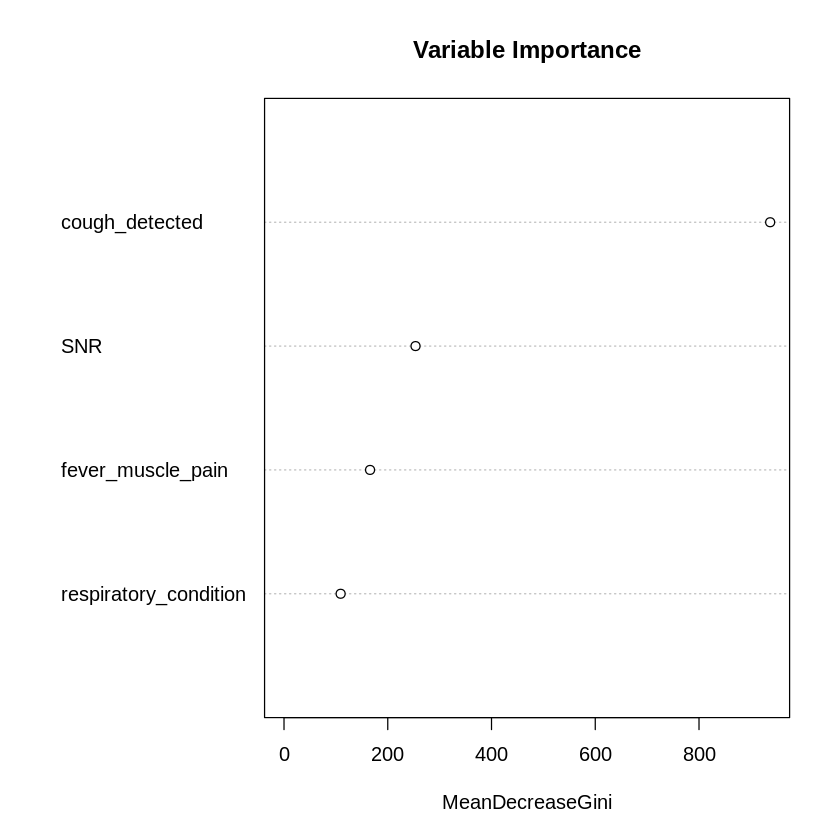

In [ ]:
varImpPlot(rf, main="Variable Importance")

In [ ]:
RF_model_VI

[1] 937.1517 253.5312 165.8722 109.1534

In [ ]:
gbmImp <- varImp(rf)

In [ ]:
gbmImp

,Overall
,<dbl>
cough_detected,937.1517
SNR,253.5312
respiratory_condition,109.1534
fever_muscle_pain,165.8722


In [ ]:
roc_imp2 <- varImp(rf, scale = FALSE)
roc_imp2

,Overall
,<dbl>
cough_detected,937.1517
SNR,253.5312
respiratory_condition,109.1534
fever_muscle_pain,165.8722


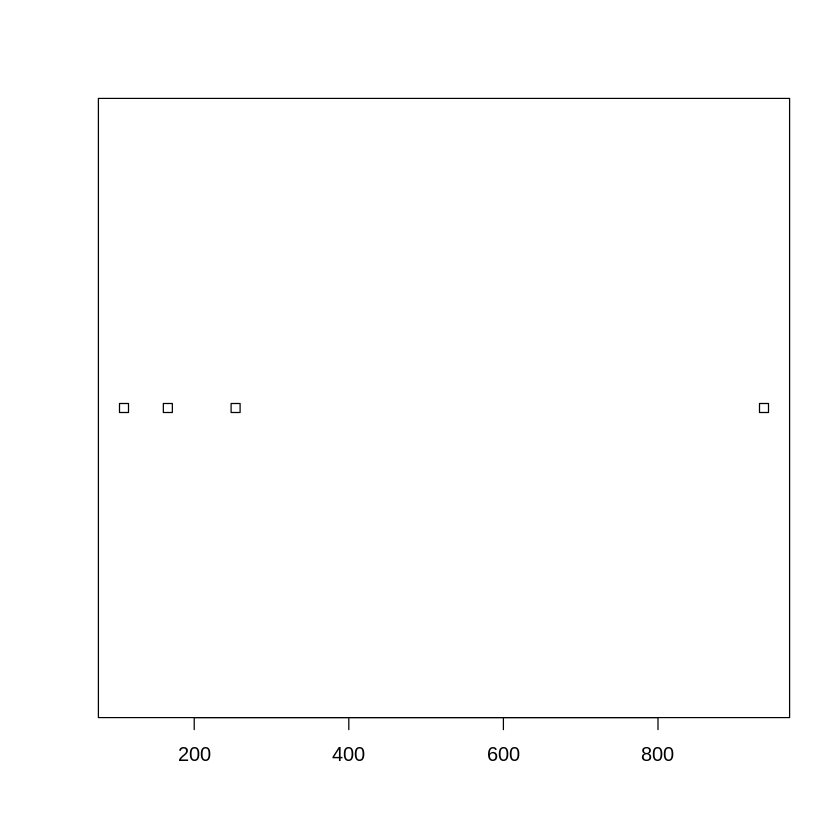

In [ ]:
plot(gbmImp)

In [ ]:
train$status <- as.character(train$status)

In [ ]:
train$status <- as.factor(train$status)

In [ ]:
summary(data)

     uuid             datetime         cough_detected        SNR       
 Length:69          Length:69          Min.   :0.0000   Min.   : 0.00  
 Class :character   Class :character   1st Qu.:1.0000   1st Qu.:10.21  
 Mode  :character   Mode  :character   Median :1.0000   Median :14.03  
                                       Mean   :0.9855   Mean   :18.22  
                                       3rd Qu.:1.0000   3rd Qu.:20.44  
                                       Max.   :1.0000   Max.   :83.02  
    latitude        longitude            age           gender         
 Min.   :-34.80   Min.   :-122.40   Min.   :14.00   Length:69         
 1st Qu.: 37.50   1st Qu.:  -3.70   1st Qu.:26.00   Class :character  
 Median : 40.40   Median :  28.70   Median :30.00   Mode  :character  
 Mean   : 33.87   Mean   :  14.09   Mean   :34.32                     
 3rd Qu.: 41.20   3rd Qu.:  51.40   3rd Qu.:44.00                     
 Max.   : 57.10   Max.   : 106.70   Max.   :69.00                     

In [ ]:
data <- na.omit(data)

In [ ]:
smp_size <- floor(0.95 * nrow(data))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(data)), size = smp_size)

train <- data[train_ind, ]
test <- data[-train_ind, ]

In [ ]:
smp_size_75 <- floor(0.75 * nrow(data))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(data)), size = smp_size)

train_75 <- data[train_ind, ]
test_75 <- data[-train_ind, ]

In [ ]:
for (i in 1:ncol(my_data)) { # For every column...
  if (typeof(my_data[[i]]) == 'character') { # if the column type is character...
    my_data[[i]] <- as.factor(my_data[[i]]) # Convert it to factor. 
  }
}

In [ ]:
train_75$status <- as.character(train_75$status)

In [ ]:
train_75$status <- as.factor(train_75$status)

In [ ]:
rf_75 <- randomForest(
  status~.,
  data=train_75
)

In [ ]:
RF_model_VI_75=varImp(rf_75)

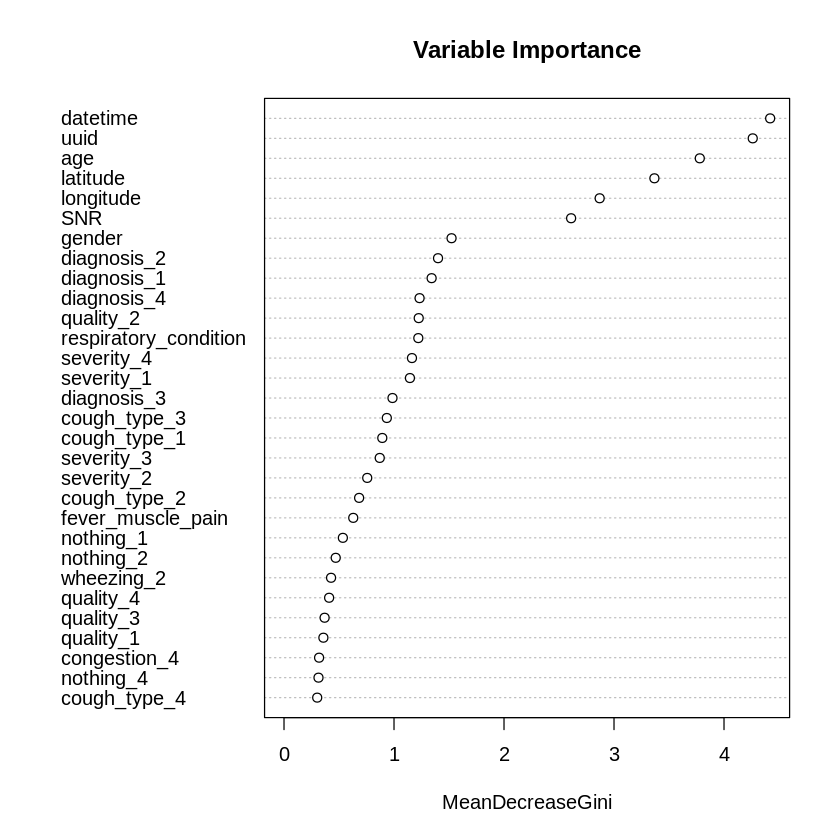

In [ ]:
varImpPlot(rf_75, main="Variable Importance")

In [ ]:
RF_model_VI_75

,Overall
,<dbl>
uuid,4.261147619
datetime,4.419464079
cough_detected,0.018837306
SNR,2.609977598
latitude,3.367181655
longitude,2.869469553
age,3.779667959
gender,1.523024494
respiratory_condition,1.220925424


In [ ]:
#running with 95-5 split
rf_95<- randomForest(
  status~.,
  data=train
)

In [ ]:
RF_model_VI_95=varImp(rf_95,scale = FALSE)

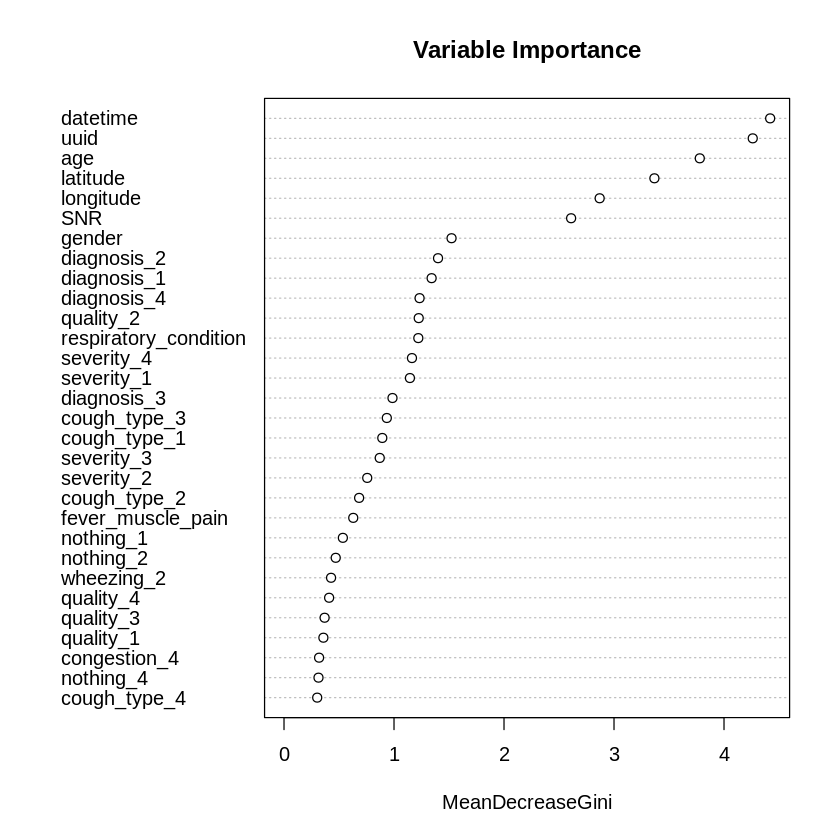

In [ ]:
varImpPlot(rf_95, main="Variable Importance")

Warning message in plot.window(xlim, ylim, log, ...):
“"top" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"top" is not a graphical parameter”
Warning message in title(xlab = xlab, ylab = ylab, ...):
“"top" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"top" is not a graphical parameter”


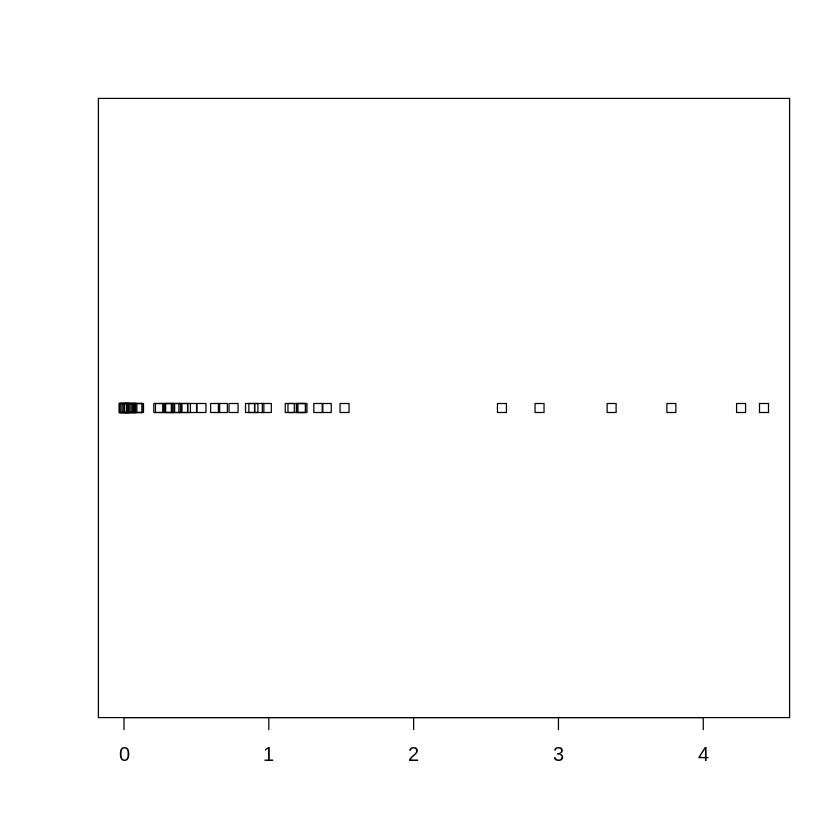

In [ ]:
plot(RF_model_VI_95, top = 20)

In [ ]:
RF_model_VI_95

,Overall
,<dbl>
uuid,4.261147619
datetime,4.419464079
cough_detected,0.018837306
SNR,2.609977598
latitude,3.367181655
longitude,2.869469553
age,3.779667959
gender,1.523024494
respiratory_condition,1.220925424


ERROR: ignored

In [ ]:
data<-data.frame(RF_model_VI_95,RF_model_VI_75)

In [ ]:
data

,Overall,Overall.1
,<dbl>,<dbl>
uuid,4.261147619,4.261147619
datetime,4.419464079,4.419464079
cough_detected,0.018837306,0.018837306
SNR,2.609977598,2.609977598
latitude,3.367181655,3.367181655
longitude,2.869469553,2.869469553
age,3.779667959,3.779667959
gender,1.523024494,1.523024494
respiratory_condition,1.220925424,1.220925424


In [ ]:
data

,Overall,Overall.1
,<dbl>,<dbl>
uuid,4.261147619,4.261147619
datetime,4.419464079,4.419464079
cough_detected,0.018837306,0.018837306
SNR,2.609977598,2.609977598
latitude,3.367181655,3.367181655
longitude,2.869469553,2.869469553
age,3.779667959,3.779667959
gender,1.523024494,1.523024494
respiratory_condition,1.220925424,1.220925424


In [ ]:
control <- rfeControl(functions=rfFuncs, method="cv", number=10)

In [ ]:
results <- rfe(my_cols, train_75$status, rfeControl=control)

In [ ]:
print(results)


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables Accuracy    Kappa AccuracySD KappaSD Selected
         4   0.2905 -0.04820    0.07841  0.1293         
         8   0.3500  0.02749    0.17713  0.2476         
        16   0.3548  0.05596    0.20801  0.2895        *
        50   0.2905 -0.04591    0.10336  0.1470         

The top 5 variables (out of 16):
   datetime, congestion_4, uuid, gender, fever_muscle_pain



In [ ]:
predictors(results)

[1] "datetime"              "congestion_4"          "uuid"                 
 [4] "gender"                "fever_muscle_pain"     "respiratory_condition"
 [7] "age"                   "quality_3"             "severity_1"           
[10] "quality_2"             "wheezing_2"            "severity_4"           
[13] "nothing_1"             "cough_type_1"          "wheezing_1"           
[16] "severity_2"

In [ ]:
my_cols=subset (train_75, select = -c(status))

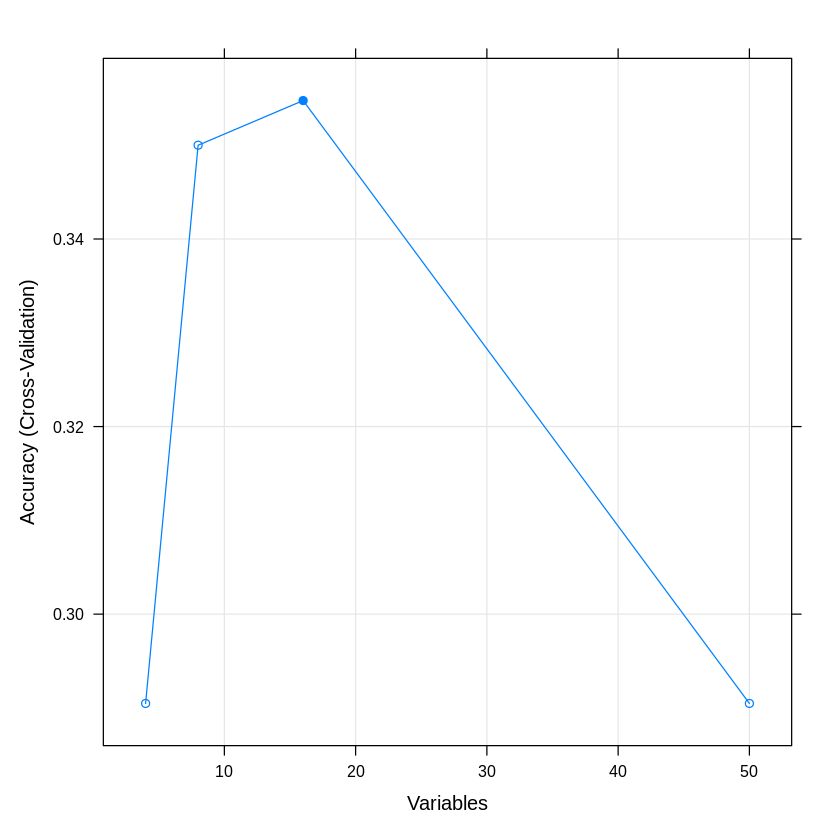

In [ ]:
plot(results, type=c("g", "o"))

In [ ]:
results


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables Accuracy    Kappa AccuracySD KappaSD Selected
         4   0.2905 -0.04820    0.07841  0.1293         
         8   0.3500  0.02749    0.17713  0.2476         
        16   0.3548  0.05596    0.20801  0.2895        *
        50   0.2905 -0.04591    0.10336  0.1470         

The top 5 variables (out of 16):
   datetime, congestion_4, uuid, gender, fever_muscle_pain


In [ ]:
summary(data)

    Overall          Overall.1      
 Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.04973   1st Qu.:0.04973  
 Median :0.38955   Median :0.38955  
 Mean   :0.83782   Mean   :0.83782  
 3rd Qu.:1.15857   3rd Qu.:1.15857  
 Max.   :4.41946   Max.   :4.41946  

In [ ]:
data_main<- read.csv("/content/metadata_compiled.csv")

In [ ]:
data_main

uuid,datetime,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,⋯,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,⋯,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>
00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11-25T18:58:50.488301+00:00,0.0155,7.326171,48.9,2.4,NA,,NA,NA,⋯,,,NA,NA,NA,NA,NA,NA,,
00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,16.151433,31.3,34.8,15,male,FALSE,FALSE,⋯,,,NA,NA,NA,NA,NA,NA,,
0007c6f1-5441-40e6-9aaf-a761d8f2da3b,2020-10-18T15:38:38.205870+00:00,0.1643,16.217201,NA,NA,46,female,FALSE,FALSE,⋯,,,NA,NA,NA,NA,NA,NA,,
0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,20.146058,40.0,-75.1,34,male,TRUE,FALSE,⋯,,,NA,NA,NA,NA,NA,NA,,
0012c608-33d0-4ef7-bde3-75a0b1a0024e,2020-04-15T01:03:59.029326+00:00,0.0482,0.000000,-16.5,-71.5,NA,,NA,NA,⋯,,,NA,NA,NA,NA,NA,NA,,
001328dc-ea5d-4847-9ccf-c5aa2a3f2d0f,2020-04-13T22:23:06.997578+00:00,0.9968,13.146502,NA,NA,21,male,FALSE,FALSE,⋯,,,NA,NA,NA,NA,NA,NA,,
001c85a8-cc4d-4921-9297-848be52d4715,2020-04-17T15:24:35.822355+00:00,0.0735,23.014715,40.6,-3.6,NA,,NA,NA,⋯,,,NA,NA,NA,NA,NA,NA,,
001d8e33-a4af-4edb-98ba-b03f891d9a6c,2020-05-13T01:27:42.552773+00:00,0.0306,12.713480,13.8,-89.6,NA,female,FALSE,TRUE,⋯,,,NA,NA,NA,NA,NA,NA,,
001e2f19-d81c-4029-b33c-d2db56b23a4a,2020-10-18T15:11:02.106636+00:00,0.7811,12.566406,45.7,4.9,20,male,TRUE,FALSE,⋯,,,NA,NA,NA,NA,NA,NA,,


In [ ]:
require(tidyverse)

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine()  masks randomForest::combine()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ purrr::lift()     masks caret::lift()
✖ ggplot2::margin() masks randomForest::margin()



In [ ]:
install.packages("revgeo")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘RCurl’, ‘RJSONIO’




In [ ]:
library(revgeo)
# the dataframe called 'main' is where the 1 million coordinate points reside.

In [ ]:
main_sub<-data_main[c("latitude","longitude")]

In [ ]:
library(revgeo)

start <- Sys.time()
#This line do all the reverse geocoding using Photon as a provider
results<-revgeo(longitude=data_main$longitude, 
                            latitude=data_main$latitude, 
                            provider = 'photon', output="frame")

end <- Sys.time()

In [ ]:
install.packages("maps")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
data_main<-data_main[!is.na(data_main$longitude), ]

In [ ]:
data_main<-data_main[!is.na(data_main$latitude), ]

In [ ]:
library(maps)

startm <- Sys.time()
#I am doing the reverse geocoding using the function map.where from the maps package.
#Here I used three maps of the package; world, state and county
country<-map.where(database="world", 
                           data_main$longitude,data_main$latitude)

endm <- Sys.time()

In [ ]:
data_main

,uuid,datetime,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,⋯,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,⋯,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>
1,00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11-25T18:58:50.488301+00:00,0.0155,7.326171,48.9,2.4,NA,,NA,NA,⋯,,,NA,NA,NA,NA,NA,NA,,
2,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,16.151433,31.3,34.8,15,male,FALSE,FALSE,⋯,,,NA,NA,NA,NA,NA,NA,,
4,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,20.146058,40.0,-75.1,34,male,TRUE,FALSE,⋯,,,NA,NA,NA,NA,NA,NA,,
5,0012c608-33d0-4ef7-bde3-75a0b1a0024e,2020-04-15T01:03:59.029326+00:00,0.0482,0.000000,-16.5,-71.5,NA,,NA,NA,⋯,,,NA,NA,NA,NA,NA,NA,,
7,001c85a8-cc4d-4921-9297-848be52d4715,2020-04-17T15:24:35.822355+00:00,0.0735,23.014715,40.6,-3.6,NA,,NA,NA,⋯,,,NA,NA,NA,NA,NA,NA,,
8,001d8e33-a4af-4edb-98ba-b03f891d9a6c,2020-05-13T01:27:42.552773+00:00,0.0306,12.713480,13.8,-89.6,NA,female,FALSE,TRUE,⋯,,,NA,NA,NA,NA,NA,NA,,
9,001e2f19-d81c-4029-b33c-d2db56b23a4a,2020-10-18T15:11:02.106636+00:00,0.7811,12.566406,45.7,4.9,20,male,TRUE,FALSE,⋯,,,NA,NA,NA,NA,NA,NA,,
10,00273cdf-ed90-4105-84ec-0c88d52f1dc0,2020-05-15T08:50:59.481638+00:00,0.0307,0.000000,43.6,-6.9,NA,,NA,NA,⋯,,,NA,NA,NA,NA,NA,NA,,
12,00291cce-36a0-4a29-9e2d-c1d96ca17242,2020-04-13T15:10:58.405156+00:00,0.9883,14.603851,39.4,67.2,15,male,FALSE,FALSE,⋯,,,NA,NA,NA,NA,NA,NA,,


In [ ]:
unique(country)

[1] "France"                           "Israel"                          
  [3] "USA"                              "Peru"                            
  [5] "Spain"                            "El Salvador"                     
  [7] NA                                 "Uzbekistan"                      
  [9] "Switzerland"                      "Turkey:North"                    
 [11] "Kazakhstan"                       "Mexico"                          
 [13] "Turkey"                           "Serbia"                          
 [15] "Brazil"                           "Argentina"                       
 [17] "Algeria"                          "Panama"                          
 [19] "Sweden"                           "Honduras"                        
 [21] "Afghanistan"                      "Togo"                            
 [23] "Iran"                             "Colombia"                        
 [25] "Greece"                           "Belgium"                         
 [27] "Italy"                            "Cameroon"                        
 [29] "Sri Lanka"                        "Bolivia"                         
 [31] "Germany"                          "Belarus"                         
 [33] "Costa Rica"                       "Egypt"                           
 [35] "South Africa"                     "Indonesia:Sumatra"               
 [37] "Romania"                          "Ukraine"                         
 [39] "Nigeria"                          "Singapore"                       
 [41] "Portugal"                         "Russia"                          
 [43] "Chile"                            "Czech Republic"                  
 [45] "Uruguay"                          "Guatemala"                       
 [47] "Indonesia:Java"                   "India"                           
 [49] "Austria"                          "Poland"                          
 [51] "Morocco"                          "Spain:Ibiza"                     
 [53] "Japan:Honshu"                     "Saudi Arabia"                    
 [55] "Palestine:2"                      "Dominican Republic"              
 [57] "Ecuador"                          "Finland"                         
 [59] "Indonesia:Bali"                   "Malaysia:Malay Penninsula"       
 [61] "Canada"                           "Canada:11"                       
 [63] "Malaysia:Sarawak"                 "Spain:Majorca"                   
 [65] "Vietnam"                          "Netherlands"                     
 [67] "Trinidad"                         "Tunisia"                         
 [69] "Greece:Kefallinia"                "Hungary"                         
 [71] "UK:Great Britain"                 "Kyrgyzstan"                      
 [73] "Maldives:2"                       "Paraguay"                        
 [75] "Venezuela"                        "Latvia"                          
 [77] "Reunion"                          "Myanmar"                         
 [79] "Croatia"                          "Somalia:Somaliland"              
 [81] "Japan:Shikoku"                    "Georgia"                         
 [83] "China"                            "Senegal"                         
 [85] "Pakistan"                         "Guadeloupe:Grande-Terre"         
 [87] "Kenya"                            "Italy:Sicily"                    
 [89] "Puerto Rico"                      "Bangladesh"                      
 [91] "Philippines:Cebu"                 "Indonesia:31"                    
 [93] "South Korea"                      "Canary Islands:Tenerife"         
 [95] "Haiti"                            "Greece:Crete"                    
 [97] "Australia"                        "Ivory Coast"                     
 [99] "Lithuania"                        "Canary Islands:Gran Canaria"     
[101] "Burkina Faso"                     "Albania"                         
[103] "France:Corsica"                   "Martinique"                      
[105] "Nepal"                            "Indonesi

In [ ]:
data_main$country<-country

In [ ]:
data_main

,uuid,datetime,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,⋯,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4,country
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,⋯,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>
1,00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11-25T18:58:50.488301+00:00,0.0155,7.326171,48.9,2.4,NA,,NA,NA,⋯,,NA,NA,NA,NA,NA,NA,,,France
2,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,16.151433,31.3,34.8,15,male,FALSE,FALSE,⋯,,NA,NA,NA,NA,NA,NA,,,Israel
4,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,20.146058,40.0,-75.1,34,male,TRUE,FALSE,⋯,,NA,NA,NA,NA,NA,NA,,,USA
5,0012c608-33d0-4ef7-bde3-75a0b1a0024e,2020-04-15T01:03:59.029326+00:00,0.0482,0.000000,-16.5,-71.5,NA,,NA,NA,⋯,,NA,NA,NA,NA,NA,NA,,,Peru
7,001c85a8-cc4d-4921-9297-848be52d4715,2020-04-17T15:24:35.822355+00:00,0.0735,23.014715,40.6,-3.6,NA,,NA,NA,⋯,,NA,NA,NA,NA,NA,NA,,,Spain
8,001d8e33-a4af-4edb-98ba-b03f891d9a6c,2020-05-13T01:27:42.552773+00:00,0.0306,12.713480,13.8,-89.6,NA,female,FALSE,TRUE,⋯,,NA,NA,NA,NA,NA,NA,,,El Salvador
9,001e2f19-d81c-4029-b33c-d2db56b23a4a,2020-10-18T15:11:02.106636+00:00,0.7811,12.566406,45.7,4.9,20,male,TRUE,FALSE,⋯,,NA,NA,NA,NA,NA,NA,,,France
10,00273cdf-ed90-4105-84ec-0c88d52f1dc0,2020-05-15T08:50:59.481638+00:00,0.0307,0.000000,43.6,-6.9,NA,,NA,NA,⋯,,NA,NA,NA,NA,NA,NA,,,NA
12,00291cce-36a0-4a29-9e2d-c1d96ca17242,2020-04-13T15:10:58.405156+00:00,0.9883,14.603851,39.4,67.2,15,male,FALSE,FALSE,⋯,,NA,NA,NA,NA,NA,NA,,,Uzbekistan


In [ ]:
write.csv(data_main, file="somedf.csv")

In [ ]:
data_main$datetime<- format(as.Date(data_main$datetime), "%Y-%m")

In [ ]:
data_main

,uuid,datetime,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,⋯,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4,country
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,⋯,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>
1,00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11,0.0155,7.326171,48.9,2.4,NA,,NA,NA,⋯,,NA,NA,NA,NA,NA,NA,,,France
2,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04,0.9609,16.151433,31.3,34.8,15,male,FALSE,FALSE,⋯,,NA,NA,NA,NA,NA,NA,,,Israel
4,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04,0.9301,20.146058,40.0,-75.1,34,male,TRUE,FALSE,⋯,,NA,NA,NA,NA,NA,NA,,,USA
5,0012c608-33d0-4ef7-bde3-75a0b1a0024e,2020-04,0.0482,0.000000,-16.5,-71.5,NA,,NA,NA,⋯,,NA,NA,NA,NA,NA,NA,,,Peru
7,001c85a8-cc4d-4921-9297-848be52d4715,2020-04,0.0735,23.014715,40.6,-3.6,NA,,NA,NA,⋯,,NA,NA,NA,NA,NA,NA,,,Spain
8,001d8e33-a4af-4edb-98ba-b03f891d9a6c,2020-05,0.0306,12.713480,13.8,-89.6,NA,female,FALSE,TRUE,⋯,,NA,NA,NA,NA,NA,NA,,,El Salvador
9,001e2f19-d81c-4029-b33c-d2db56b23a4a,2020-10,0.7811,12.566406,45.7,4.9,20,male,TRUE,FALSE,⋯,,NA,NA,NA,NA,NA,NA,,,France
10,00273cdf-ed90-4105-84ec-0c88d52f1dc0,2020-05,0.0307,0.000000,43.6,-6.9,NA,,NA,NA,⋯,,NA,NA,NA,NA,NA,NA,,,NA
12,00291cce-36a0-4a29-9e2d-c1d96ca17242,2020-04,0.9883,14.603851,39.4,67.2,15,male,FALSE,FALSE,⋯,,NA,NA,NA,NA,NA,NA,,,Uzbekistan


In [ ]:
covid<- read.csv("/content/covid_19_clean_complete.csv")

In [ ]:
covid$Date<- format(as.Date(covid$Date), "%Y-%m")

In [ ]:
covid<-covid %>% select(2,5,9)

In [ ]:
colnames(covid)

[1] "Country.Region" "Date"           "Active"

In [ ]:
colnames(covid)[1] <- "country"

In [ ]:
colnames(covid)[2] <- "datetime"

In [ ]:
unique(covid$Date)

NULL

In [ ]:
unique(data_main$datetime)

[1] "2020-11" "2020-04" "2020-05" "2020-10" "2020-07" "2020-06" "2020-08"
[8] "2020-09"

In [ ]:
scored_policies<-merge(x=data_main,y=covid,by = c("datetime"),all.x = TRUE)

In [ ]:
dim(scored_policies)

In [ ]:
dim(data_main)

[1] 16084    52

In [ ]:
library(dplyr)
left_join(data_main,covid, by = c("country"="country"))

uuid,datetime.x,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,⋯,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4,country,datetime.y,Active
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<int>
00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11,0.0155,7.326171,48.9,2.4,NA,,NA,NA,⋯,NA,NA,NA,NA,NA,,,France,2020-01,0
00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11,0.0155,7.326171,48.9,2.4,NA,,NA,NA,⋯,NA,NA,NA,NA,NA,,,France,2020-01,0
00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11,0.0155,7.326171,48.9,2.4,NA,,NA,NA,⋯,NA,NA,NA,NA,NA,,,France,2020-01,0
00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11,0.0155,7.326171,48.9,2.4,NA,,NA,NA,⋯,NA,NA,NA,NA,NA,,,France,2020-01,0
00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11,0.0155,7.326171,48.9,2.4,NA,,NA,NA,⋯,NA,NA,NA,NA,NA,,,France,2020-01,0
00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11,0.0155,7.326171,48.9,2.4,NA,,NA,NA,⋯,NA,NA,NA,NA,NA,,,France,2020-01,0
00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11,0.0155,7.326171,48.9,2.4,NA,,NA,NA,⋯,NA,NA,NA,NA,NA,,,France,2020-01,0
00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11,0.0155,7.326171,48.9,2.4,NA,,NA,NA,⋯,NA,NA,NA,NA,NA,,,France,2020-01,0
00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11,0.0155,7.326171,48.9,2.4,NA,,NA,NA,⋯,NA,NA,NA,NA,NA,,,France,2020-01,0


In [ ]:
table(scored_policies$uuid)


00014dcc-0f06-4c27-8c7b-737b18a2cf4c 00039425-7f3a-42aa-ac13-834aaa2b6b92 
                                 360                                   30 
0009eb28-d8be-4dc1-92bb-907e53bc5c7a 0012c608-33d0-4ef7-bde3-75a0b1a0024e 
                                   1                                   30 
001c85a8-cc4d-4921-9297-848be52d4715 001d8e33-a4af-4edb-98ba-b03f891d9a6c 
                                  30                                   31 
001e2f19-d81c-4029-b33c-d2db56b23a4a 00273cdf-ed90-4105-84ec-0c88d52f1dc0 
                                 372                                    1 
00291cce-36a0-4a29-9e2d-c1d96ca17242 00357712-dd5a-4c0a-90a4-39f1f4b9d5fd 
                                  30                                   30 
0037f67c-0d6f-42e6-ab94-66499d4d2bf4 00389fd1-f404-4124-acd5-61f6635727cb 
                                   1                                   30 
00432f00-2477-4faf-a440-cc1276065b4a 0044cb7b-448c-44e5-8302-ad8bd106fe3e 
                        

In [ ]:
country_data<- read.csv("/content/population_by_country_2020.csv")

In [ ]:
country_data

Country..or.dependency.,Population..2020.,Yearly.Change,Net.Change,Density..P.Km..,Land.Area..Km..,Migrants..net.,Fert..Rate,Med..Age,Urban.Pop..,World.Share
<chr>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>
China,1440297825,0.39 %,5540090,153,9388211,-348399,1.7,38,61 %,18.47 %
India,1382345085,0.99 %,13586631,464,2973190,-532687,2.2,28,35 %,17.70 %
United States,331341050,0.59 %,1937734,36,9147420,954806,1.8,38,83 %,4.25 %
Indonesia,274021604,1.07 %,2898047,151,1811570,-98955,2.3,30,56 %,3.51 %
Pakistan,221612785,2.00 %,4327022,287,770880,-233379,3.6,23,35 %,2.83 %
Brazil,212821986,0.72 %,1509890,25,8358140,21200,1.7,33,88 %,2.73 %
Nigeria,206984347,2.58 %,5175990,226,910770,-60000,5.4,18,52 %,2.64 %
Bangladesh,164972348,1.01 %,1643222,1265,130170,-369501,2.1,28,39 %,2.11 %
Russia,145945524,0.04 %,62206,9,16376870,182456,1.8,40,74 %,1.87 %


In [ ]:
colnames(country_data)[1]<-"country"

In [ ]:
big_data<-merge(x=scored_policies,y=country_data,by ="country")

In [ ]:
summary(big_data)

   country            datetime             uuid           cough_detected  
 Length:1083262     Length:1083262     Length:1083262     Min.   :0.0000  
 Class :character   Class :character   Class :character   1st Qu.:0.1859  
 Mode  :character   Mode  :character   Mode  :character   Median :0.8571  
                                                          Mean   :0.6393  
                                                          3rd Qu.:0.9845  
                                                          Max.   :1.0000  
                                                                          
      SNR            latitude        longitude             age        
 Min.   :-4.719   Min.   :-53.10   Min.   :-122.600   Min.   :  1     
 1st Qu.: 5.422   1st Qu.: 43.10   1st Qu.:   0.200   1st Qu.: 29     
 Median :11.795   Median : 46.10   Median :   2.700   Median : 40     
 Mean   :   Inf   Mean   : 41.43   Mean   :   3.719   Mean   : 41     
 3rd Qu.:19.096   3rd Qu.: 48.70   3rd Qu.:  

In [ ]:
big_data <- na.omit(big_data)

In [ ]:
big_data

,country,datetime,uuid,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,⋯,Population..2020.,Yearly.Change,Net.Change,Density..P.Km..,Land.Area..Km..,Migrants..net.,Fert..Rate,Med..Age,Urban.Pop..,World.Share
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,⋯,<int>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>
5219,Argentina,2020-04,37ac823b-4e39-4e85-a6c1-5e1e79979a13,1,16.46078,-34.6,-58.4,29,male,TRUE,⋯,45267449,0.93 %,415097,17,2736690,4800,2.3,32,93 %,0.58 %
5220,Argentina,2020-04,37ac823b-4e39-4e85-a6c1-5e1e79979a13,1,16.46078,-34.6,-58.4,29,male,TRUE,⋯,45267449,0.93 %,415097,17,2736690,4800,2.3,32,93 %,0.58 %
5221,Argentina,2020-04,37ac823b-4e39-4e85-a6c1-5e1e79979a13,1,16.46078,-34.6,-58.4,29,male,TRUE,⋯,45267449,0.93 %,415097,17,2736690,4800,2.3,32,93 %,0.58 %
5222,Argentina,2020-04,37ac823b-4e39-4e85-a6c1-5e1e79979a13,1,16.46078,-34.6,-58.4,29,male,TRUE,⋯,45267449,0.93 %,415097,17,2736690,4800,2.3,32,93 %,0.58 %
5223,Argentina,2020-04,37ac823b-4e39-4e85-a6c1-5e1e79979a13,1,16.46078,-34.6,-58.4,29,male,TRUE,⋯,45267449,0.93 %,415097,17,2736690,4800,2.3,32,93 %,0.58 %
5224,Argentina,2020-04,37ac823b-4e39-4e85-a6c1-5e1e79979a13,1,16.46078,-34.6,-58.4,29,male,TRUE,⋯,45267449,0.93 %,415097,17,2736690,4800,2.3,32,93 %,0.58 %
5225,Argentina,2020-04,37ac823b-4e39-4e85-a6c1-5e1e79979a13,1,16.46078,-34.6,-58.4,29,male,TRUE,⋯,45267449,0.93 %,415097,17,2736690,4800,2.3,32,93 %,0.58 %
5226,Argentina,2020-04,37ac823b-4e39-4e85-a6c1-5e1e79979a13,1,16.46078,-34.6,-58.4,29,male,TRUE,⋯,45267449,0.93 %,415097,17,2736690,4800,2.3,32,93 %,0.58 %
5227,Argentina,2020-04,37ac823b-4e39-4e85-a6c1-5e1e79979a13,1,16.46078,-34.6,-58.4,29,male,TRUE,⋯,45267449,0.93 %,415097,17,2736690,4800,2.3,32,93 %,0.58 %


# Combing a risk factor

In [ ]:
cases <- read.csv("/content/covid_19_clean_complete.csv")

In [ ]:
population <- read.csv("/content/population_by_country_2020.csv")

In [ ]:
head(cases)
colnames(cases)

,Province.State,Country.Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO.Region
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>
1,,Afghanistan,33.93911,67.70995,2020-01-22,0,0,0,0,Eastern Mediterranean
2,,Albania,41.15330,20.16830,2020-01-22,0,0,0,0,Europe
3,,Algeria,28.03390,1.65960,2020-01-22,0,0,0,0,Africa
4,,Andorra,42.50630,1.52180,2020-01-22,0,0,0,0,Europe
5,,Angola,-11.20270,17.87390,2020-01-22,0,0,0,0,Africa
6,,Antigua and Barbuda,17.06080,-61.79640,2020-01-22,0,0,0,0,Americas


[1] "Province.State" "Country.Region" "Lat"            "Long"          
 [5] "Date"           "Confirmed"      "Deaths"         "Recovered"     
 [9] "Active"         "WHO.Region"

In [ ]:
cases<-cases[c(2,5,9)]

In [ ]:
colnames(cases)[1]<-"country"

In [ ]:
colnames(cases)

[1] "country" "Date"    "Active"

In [ ]:
colnames(population)[1]<-"country"
colnames(population)[2]<-"population"

In [ ]:
population<-population[c(1,2)]

In [ ]:
(population)

country,population
<chr>,<int>
China,1440297825
India,1382345085
United States,331341050
Indonesia,274021604
Pakistan,221612785
Brazil,212821986
Nigeria,206984347
Bangladesh,164972348
Russia,145945524


In [ ]:
cases$Date<- format(as.Date(cases$Date), "%Y-%m")

In [ ]:
cases

country,Date,Active
<chr>,<chr>,<int>
Afghanistan,2020-01,0
Albania,2020-01,0
Algeria,2020-01,0
Andorra,2020-01,0
Angola,2020-01,0
Antigua and Barbuda,2020-01,0
Argentina,2020-01,0
Armenia,2020-01,0
Australia,2020-01,0


In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
country_date_cases <- cases %>% group_by(country,Date)

In [ ]:
cases_by_month_by_country <- country_date_cases%>% summarise(n = n())

`summarise()` has grouped output by 'country'. You can override using the `.groups` argument.



In [ ]:
cases_by_month_by_country

country,Date,n
<chr>,<chr>,<int>
Afghanistan,2020-01,10
Afghanistan,2020-02,29
Afghanistan,2020-03,31
Afghanistan,2020-04,30
Afghanistan,2020-05,31
Afghanistan,2020-06,30
Afghanistan,2020-07,31
Afghanistan,2020-08,31
Afghanistan,2020-09,30


In [ ]:
df = merge(x=cases_by_month_by_country,y=population,by="country")
df


country,Date,n,population
<chr>,<chr>,<int>,<int>
Afghanistan,2021-09,30,39074280
Afghanistan,2020-08,31,39074280
Afghanistan,2020-04,30,39074280
Afghanistan,2021-08,31,39074280
Afghanistan,2020-03,31,39074280
Afghanistan,2021-07,31,39074280
Afghanistan,2021-05,31,39074280
Afghanistan,2020-05,31,39074280
Afghanistan,2021-10,5,39074280


In [ ]:
cd <-(df[3]/df[4])

In [ ]:
colnames(cd)[1]<-"ratio"

In [ ]:
df["ratio"]<-cd

In [ ]:
df<-df[c(1,2,5)]

In [ ]:
df

country,Date,ratio
<chr>,<chr>,<dbl>
Afghanistan,2021-09,1.964895e-14
Afghanistan,2020-08,2.030391e-14
Afghanistan,2020-04,1.964895e-14
Afghanistan,2021-08,2.030391e-14
Afghanistan,2020-03,2.030391e-14
Afghanistan,2021-07,2.030391e-14
Afghanistan,2021-05,2.030391e-14
Afghanistan,2020-05,2.030391e-14
Afghanistan,2021-10,3.274825e-15


In [ ]:
main <- read.csv("/content/somedf.csv")

In [ ]:
main
colnames(main)[3]<-"Date"

X,uuid,Date,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,⋯,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4,country
<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,⋯,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>
1,00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11,0.0155,7.326171,48.9,2.4,NA,,NA,⋯,,NA,NA,NA,NA,NA,NA,,,France
2,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04,0.9609,16.151433,31.3,34.8,15,male,FALSE,⋯,,NA,NA,NA,NA,NA,NA,,,Israel
4,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04,0.9301,20.146058,40.0,-75.1,34,male,TRUE,⋯,,NA,NA,NA,NA,NA,NA,,,USA
5,0012c608-33d0-4ef7-bde3-75a0b1a0024e,2020-04,0.0482,0.000000,-16.5,-71.5,NA,,NA,⋯,,NA,NA,NA,NA,NA,NA,,,Peru
7,001c85a8-cc4d-4921-9297-848be52d4715,2020-04,0.0735,23.014715,40.6,-3.6,NA,,NA,⋯,,NA,NA,NA,NA,NA,NA,,,Spain
8,001d8e33-a4af-4edb-98ba-b03f891d9a6c,2020-05,0.0306,12.713480,13.8,-89.6,NA,female,FALSE,⋯,,NA,NA,NA,NA,NA,NA,,,El Salvador
9,001e2f19-d81c-4029-b33c-d2db56b23a4a,2020-10,0.7811,12.566406,45.7,4.9,20,male,TRUE,⋯,,NA,NA,NA,NA,NA,NA,,,France
10,00273cdf-ed90-4105-84ec-0c88d52f1dc0,2020-05,0.0307,0.000000,43.6,-6.9,NA,,NA,⋯,,NA,NA,NA,NA,NA,NA,,,NA
12,00291cce-36a0-4a29-9e2d-c1d96ca17242,2020-04,0.9883,14.603851,39.4,67.2,15,male,FALSE,⋯,,NA,NA,NA,NA,NA,NA,,,Uzbekistan


In [ ]:
main$Date<- format(as.Date(main$Date), "%Y-%m")

In [ ]:
df2 <- merge(x=main,y=df,by=c("country","Date"))

In [ ]:
df2

country,Date,X,uuid,cough_detected,SNR,latitude,longitude,age,gender,⋯,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4,ratio
<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<dbl>
Afghanistan,2020-04,6478,3c57611a-f237-4191-9c85-debfe839c01a,0.8382,12.760354,34.4,62.2,45,male,⋯,,NA,NA,NA,NA,NA,NA,,,1.964895e-14
Afghanistan,2020-04,27525,ffbbc942-d2d1-4f46-a09a-9aa0f7e1c8c2,0.9749,0.000000,37.2,67.3,NA,female,⋯,,NA,NA,NA,NA,NA,NA,,,1.964895e-14
Afghanistan,2020-04,21577,c8bbce8c-2da2-49ea-b7ed-6552c856bf47,0.9845,9.535531,37.2,67.3,18,male,⋯,,NA,NA,NA,NA,NA,NA,,,1.964895e-14
Afghanistan,2020-04,19096,b1ed4cc0-44d6-4090-a255-7711e02a3b13,0.0837,5.485290,37.2,67.3,NA,female,⋯,,NA,NA,NA,NA,NA,NA,,,1.964895e-14
Afghanistan,2020-04,22479,d15c8799-3ddc-45bb-aca9-55944fde8b71,0.4449,15.711743,34.5,69.1,NA,,⋯,,NA,NA,NA,NA,NA,NA,,,1.964895e-14
Afghanistan,2020-04,26089,f2d50426-43b7-4ee0-9eac-c62363a9b16d,0.3956,9.712674,37.2,67.2,17,male,⋯,,NA,NA,NA,NA,NA,NA,,,1.964895e-14
Afghanistan,2020-04,19865,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,0.0971,0.000000,37.2,67.3,NA,,⋯,,NA,NA,NA,NA,NA,NA,,,1.964895e-14
Afghanistan,2020-04,20172,bbb25e2f-8f40-420f-a2e5-fb2a24796481,0.9902,14.384931,34.4,69.1,NA,,⋯,,NA,NA,NA,NA,NA,NA,,,1.964895e-14
Afghanistan,2020-04,63,0096a99b-8f20-4bd5-9738-eee7f9fed1d6,0.9943,20.144813,34.4,69.1,NA,,⋯,,NA,NA,NA,NA,NA,NA,,,1.964895e-14


In [ ]:
write.csv(df2, file="extreme.csv")

In [ ]:
drops <- c("X")
df2<-df2[ , !(names(df2) %in% drops)]

In [ ]:
df2<-read.csv("/content/extreme.csv")

In [ ]:
df2<-df2[ , !(names(df2) %in% drops)]

In [ ]:
df2 <- na.omit(df2)

In [ ]:
for (i in 1:ncol(df2)) { # For every column...
  if (typeof(df2[[i]]) == 'character') { # if the column type is character...
    df2[[i]] <- as.factor(df2[[i]]) # Convert it to factor. 
  }
}

In [ ]:
smp_size <- floor(0.75 * nrow(df2))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(df2)), size = smp_size)

train_75 <- df2[train_ind, ]
test_75 <- df2[-train_ind, ]

In [ ]:
train_75$status <- as.character(train_75$status)

In [ ]:
train_75$status <- as.factor(train_75$status)

In [ ]:
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
require(randomForest)

Loading required package: randomForest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [ ]:
train_75$uuid <- as.character(train_75$uuid)
train_75$uuid <- as.factor(train_75$uuid)

In [ ]:
dim()

In [ ]:
dim(train_75)

[1] 44 53

In [ ]:
summary(train_75)

        country        Date                                      uuid   
 Uzbekistan :12   2020-04:41   0f8d80f9-700e-4069-924d-e15f29d7c19a: 1  
 Turkey     : 9   2020-05: 3   1dd3b212-e969-4ede-a9d9-f24b711e2028: 1  
 Spain      : 8                1ed9491a-4036-4308-bc44-5036fc2e9f28: 1  
 Switzerland: 3                21aee478-6d13-45ea-be4d-4f29fd244798: 1  
 Russia     : 2                29426ec2-55bf-4ce0-a591-bd7ea2dd9a6c: 1  
 Brazil     : 1                2e4456dd-bb47-45f7-b2ef-7b2d2f2859c6: 1  
 (Other)    : 9                (Other)                             :38  
 cough_detected        SNR           latitude        longitude       
 Min.   :0.0000   Min.   : 0.00   Min.   :-33.50   Min.   :-116.900  
 1st Qu.:1.0000   1st Qu.:10.23   1st Qu.: 37.77   1st Qu.:   2.675  
 Median :1.0000   Median :15.40   Median : 40.55   Median :  29.300  
 Mean   :0.9773   Mean   :17.86   Mean   : 36.65   Mean   :  27.416  
 3rd Qu.:1.0000   3rd Qu.:19.98   3rd Qu.: 41.52   3rd Qu.:  66.17

In [ ]:
rf_75 <- randomForest(
  status~.,
  data=train_75
)

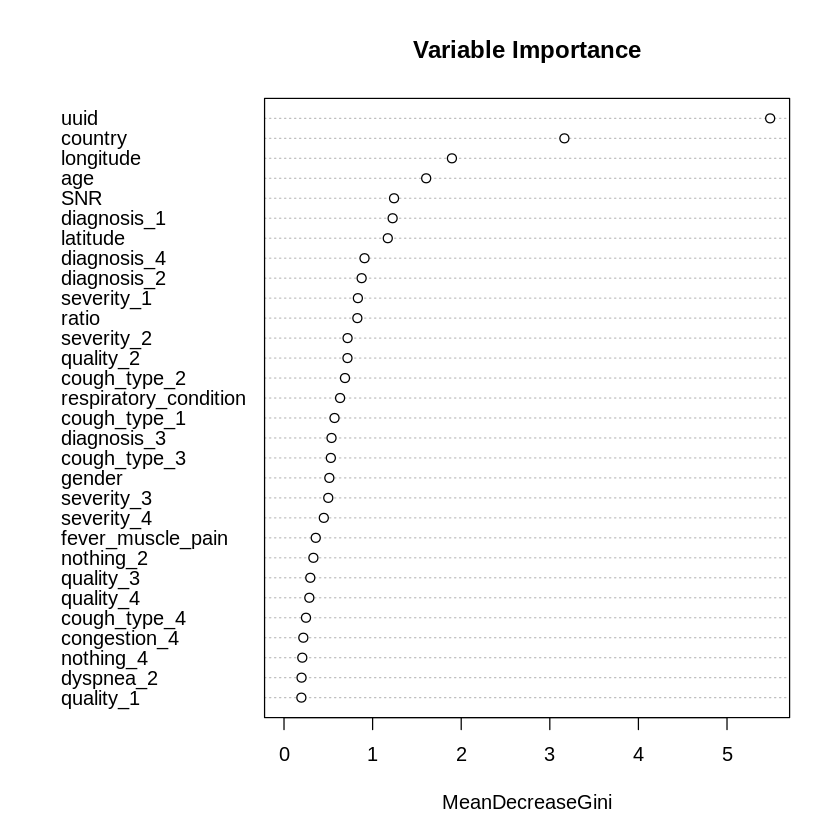

In [ ]:
varImpPlot(rf_75, main="Variable Importance")

In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
require(caret)

Loading required package: caret

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [ ]:
control <- rfeControl(functions=rfFuncs, method="cv", number=10)

In [ ]:
my_cols=subset (train_75, select = -c(status))

In [ ]:
results <- rfe(my_cols, train_75$status, rfeControl=control)

In [ ]:
print(results)


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables Accuracy   Kappa AccuracySD KappaSD Selected
         4    0.420 0.07990     0.1703  0.2677         
         8    0.345 0.01594     0.2101  0.3241         
        16    0.435 0.14255     0.1248  0.1850         
        52    0.480 0.20053     0.1636  0.2301        *

The top 5 variables (out of 52):
   country, diagnosis_1, congestion_4, cough_type_2, severity_1



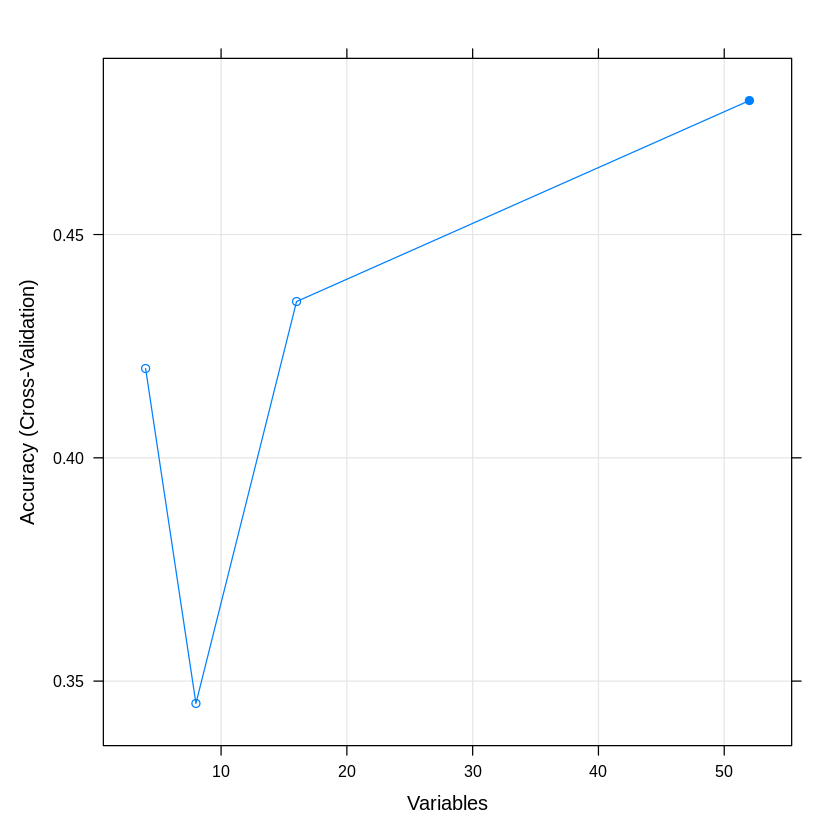

In [ ]:
plot(results, type=c("g", "o"))

# Gradient Boosting

In [175]:
install.packages("xgboost")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [176]:
library(tidyverse)
library(caret)
library(xgboost)


Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




In [177]:
df3<-read.csv("/content/extreme.csv")

In [178]:
df3<-df3[ , !(names(df3) %in% drops)]

In [179]:
df3 <- na.omit(df3)

In [180]:
for (i in 1:ncol(df3)) { # For every column...
  if (typeof(df3[[i]]) == 'character') { # if the column type is character...
    df3[[i]] <- as.factor(df3[[i]]) # Convert it to factor. 
  }
}

In [181]:
smp_size <- floor(0.75 * nrow(df3))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(df3)), size = smp_size)

train_75 <- df3[train_ind, ]
test_75 <- df3[-train_ind, ]

In [182]:
train_75$status <- as.character(train_75$status)

In [183]:
train_75$status <- as.factor(train_75$status)

In [188]:
test_75$status <- as.character(test_75$status)
test_75$status <- as.factor(test_75$status)

In [184]:
train_75$uuid <- as.character(train_75$uuid)
train_75$uuid <- as.factor(train_75$uuid)

In [185]:
model <- train(
  status~.,
  data=train_75, method = "xgbTree",
  trControl = trainControl("cv", number = 10)
  )

In [186]:
model$bestTune

,nrounds,max_depth,eta,gamma,colsample_bytree,min_child_weight,subsample
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
94,50,3,0.4,0,0.6,1,0.75


In [190]:
my_cols=subset (train_75, select = -c(status))

In [191]:
results <- rfe(my_cols, train_75$status, rfeControl=control)

In [192]:
print(results)


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables Accuracy   Kappa AccuracySD KappaSD Selected
         4   0.3600 0.04353     0.1713  0.2345         
         8   0.3983 0.10412     0.2203  0.3267         
        16   0.4317 0.16204     0.2144  0.2892         
        52   0.5217 0.28127     0.2462  0.3407        *

The top 5 variables (out of 52):
   country, congestion_4, diagnosis_1, severity_1, cough_type_4



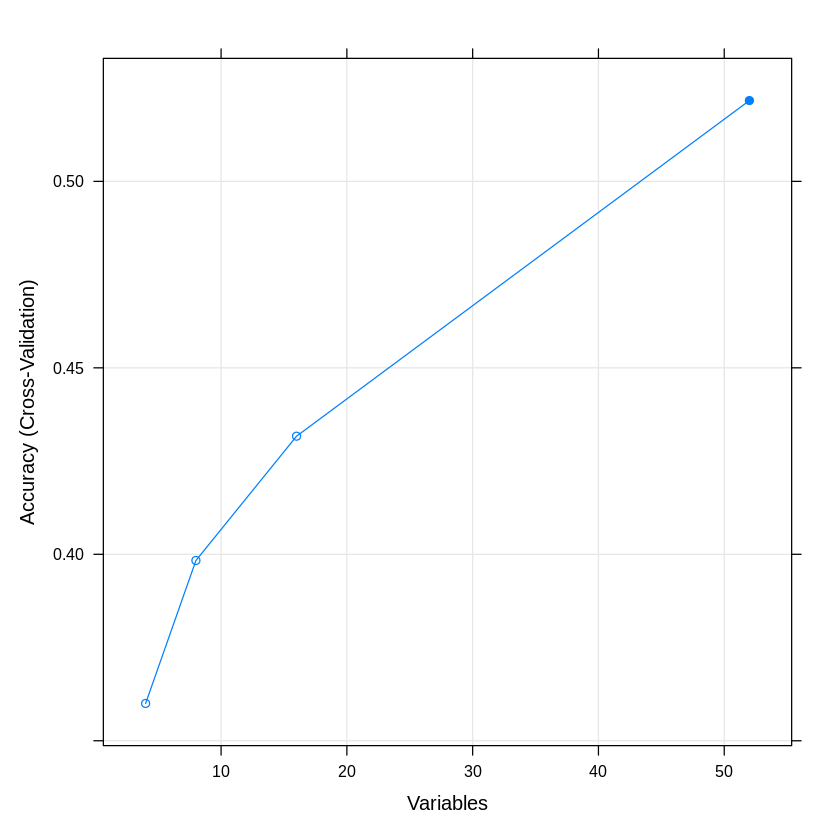

In [193]:
plot(results, type=c("g", "o"))

In [194]:
varImp(model)

xgbTree variable importance

  only 20 most important variables shown (out of 154)

                           Overall
longitude                   100.00
latitude                     79.13
age                          67.44
ratio                        64.56
nothing_2TRUE                47.85
SNR                          46.92
severity_1mild               34.84
fever_muscle_painTRUE        33.81
respiratory_conditionTRUE    32.51
cough_type_2dry              31.22
diagnosis_1COVID-19          30.17
severity_2mild               21.07
cough_type_3wet              18.92
diagnosis_3upper_infection   18.82
diagnosis_2lower_infection   18.43
diagnosis_1healthy_cough     15.17
diagnosis_4upper_infection   14.73
countryUzbekistan            14.00
genderother                  13.91
diagnosis_1lower_infection   13.23

In [202]:
summary(df3)

        country        Date                                      uuid   
 Uzbekistan :14   2020-04:56   0f8d80f9-700e-4069-924d-e15f29d7c19a: 1  
 Turkey     :13   2020-05: 3   0f8fb3e0-1a30-4bd3-982a-24342a0bdc70: 1  
 Spain      :12                1dd3b212-e969-4ede-a9d9-f24b711e2028: 1  
 Switzerland: 4                1ed9491a-4036-4308-bc44-5036fc2e9f28: 1  
 Russia     : 2                21aee478-6d13-45ea-be4d-4f29fd244798: 1  
 Argentina  : 1                29426ec2-55bf-4ce0-a591-bd7ea2dd9a6c: 1  
 (Other)    :13                (Other)                             :53  
 cough_detected        SNR           latitude        longitude      
 Min.   :0.0000   Min.   : 0.00   Min.   :-34.80   Min.   :-116.90  
 1st Qu.:1.0000   1st Qu.:10.34   1st Qu.: 37.45   1st Qu.:  -3.35  
 Median :1.0000   Median :14.03   Median : 40.40   Median :  29.20  
 Mean   :0.9831   Mean   :17.40   Mean   : 33.68   Mean   :  20.33  
 3rd Qu.:1.0000   3rd Qu.:20.13   3rd Qu.: 41.25   3rd Qu.:  62.70  
 M

In [203]:
library(dplyr)

set.seed(1234)
dat2 <- df3 %>% mutate_at(c("ratio"), ~(scale(.) %>% as.vector))
dat2

,country,Date,uuid,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,⋯,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4,ratio
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>,⋯,<fct>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<fct>,<fct>,<dbl>
255,Argentina,2020-04,37ac823b-4e39-4e85-a6c1-5e1e79979a13,1,16.460779,-34.6,-58.4,29,male,TRUE,⋯,dry,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,healthy_cough,pseudocough,-0.26463716
816,Brazil,2020-04,7ddc9d8f-ed3b-4f9d-8abf-2e4d01aa09b2,1,0.000000,-23.5,-46.6,30,male,TRUE,⋯,unknown,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,,unknown,-0.30383460
1173,Chile,2020-04,6462d540-48bc-410b-b08e-cdf0b45ee118,1,23.883169,-33.5,-70.7,45,male,TRUE,⋯,wet,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,lower_infection,mild,-0.07615990
1314,Colombia,2020-04,d7e71034-14a0-4ebb-870c-11bffb7d80d4,1,13.221483,4.7,-74.3,28,female,FALSE,⋯,dry,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,upper_infection,mild,-0.27331768
2026,France,2020-04,1ed9491a-4036-4308-bc44-5036fc2e9f28,1,12.047627,46.7,5.6,55,male,FALSE,⋯,dry,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,upper_infection,mild,-0.06893361
4527,Iran,2020-04,98fb6294-d339-4c83-8ff5-2bbcf82e35e0,1,9.574990,35.7,51.4,40,male,FALSE,⋯,dry,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,obstructive_disease,mild,-0.29381927
4690,Israel,2020-04,ea14fc20-28a3-4cb1-aaa6-c7081ba3dd29,1,17.772036,32.0,34.8,28,male,FALSE,⋯,dry,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,COVID-19,mild,0.81128749
5163,Mexico,2020-04,9333c624-ef59-44f6-9643-fa9b2485c173,1,9.995319,32.5,-116.9,35,male,FALSE,⋯,dry,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,upper_infection,mild,-0.30064956
5309,Morocco,2020-04,637d6498-1d52-4860-9976-5a7a94f2a0c3,1,18.418822,35.9,-5.3,55,other,TRUE,⋯,dry,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,upper_infection,,-0.24419267


In [204]:
smp_size <- floor(0.75 * nrow(df3))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(df3)), size = smp_size)

train_75 <- df3[train_ind, ]
test_75 <- df3[-train_ind, ]

In [205]:
train_75$status <- as.character(train_75$status)

In [206]:
train_75$status <- as.factor(train_75$status)

In [211]:
train_75$uuid <- as.character(train_75$uuid)
train_75$uuid <- as.factor(train_75$uuid)

In [212]:
model <- train(
  status~.,
  data=train_75, method = "xgbTree",
  trControl = trainControl("cv", number = 10)
  )

In [213]:
model$bestTune

,nrounds,max_depth,eta,gamma,colsample_bytree,min_child_weight,subsample
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
75,150,2,0.4,0,0.6,1,0.5


In [208]:
model$bestTune

,nrounds,max_depth,eta,gamma,colsample_bytree,min_child_weight,subsample
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12,150,1,0.3,0,0.8,1,0.5


In [214]:
my_cols=subset (train_75, select = -c(status))

In [215]:
results <- rfe(my_cols, train_75$status, rfeControl=control)

In [216]:
print(results)


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         4   0.4183 0.1280     0.2602  0.3501         
         8   0.4517 0.1787     0.2239  0.3185         
        16   0.4733 0.2020     0.2505  0.3806         
        52   0.5183 0.2518     0.2371  0.3596        *

The top 5 variables (out of 52):
   country, cough_type_4, diagnosis_1, congestion_4, cough_type_2



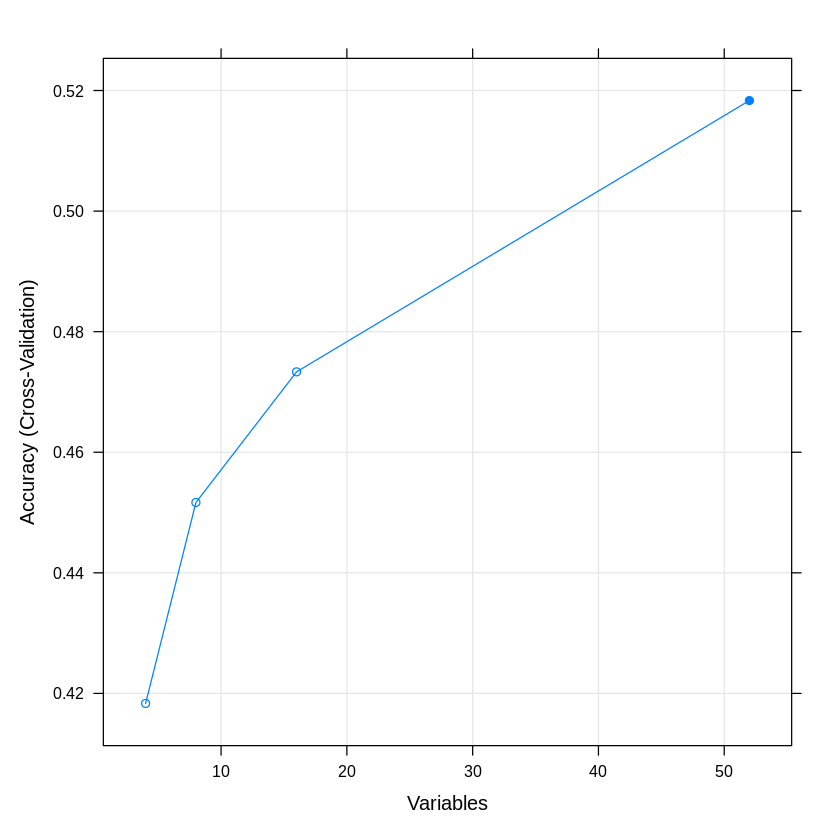

In [217]:
plot(results, type=c("g", "o"))

# RF on std. Data

In [218]:
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [219]:
rf_75 <- randomForest(
  status~.,
  data=train_75
)

In [220]:
results <- rfe(my_cols, train_75$status, rfeControl=control)

In [221]:
print(results)


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables Accuracy   Kappa AccuracySD KappaSD Selected
         4   0.3900 0.09137     0.2635  0.3532         
         8   0.3983 0.04999     0.2179  0.3990         
        16   0.4350 0.11666     0.1828  0.3337         
        52   0.4650 0.15399     0.2016  0.2988        *

The top 5 variables (out of 52):
   country, Date, congestion_4, cough_type_4, diagnosis_1



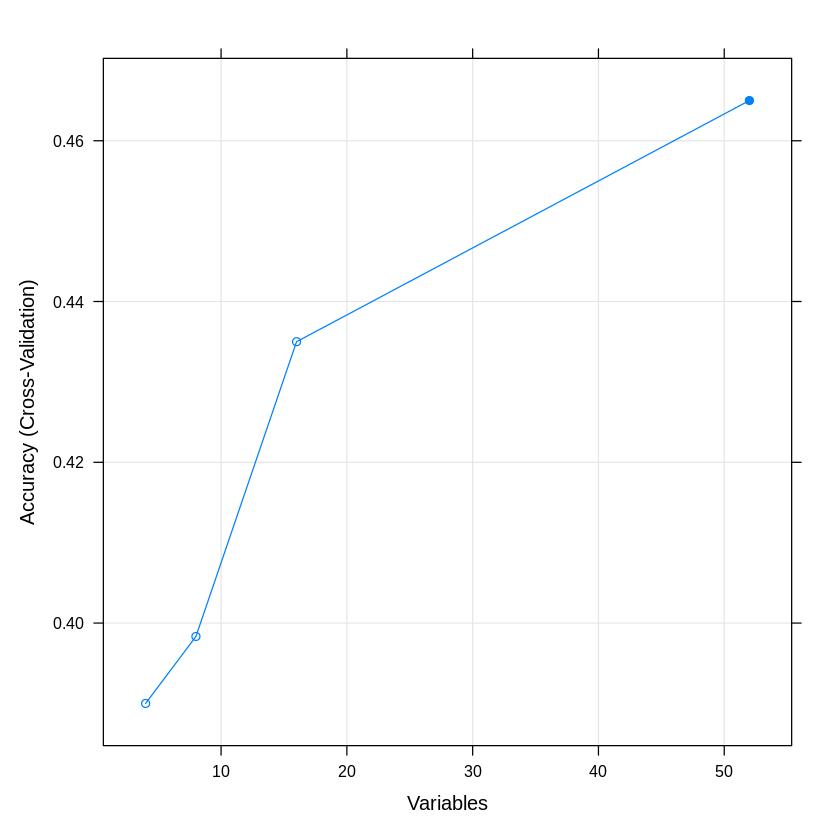

In [222]:
plot(results, type=c("g", "o"))

We can see that the ratio column was already normalized as it had its value between 0 and 1, when we standarised it its value changed, but it impacted the model negatively as we lost almost 1.5% accuracy on RF and .3% on GD, having said that, GD is more robust in ways that it can deal with changes of multiple mangitude by losing only a few points in accuracy.

Kappa: https://stats.stackexchange.com/questions/124001/what-is-the-intuition-behind-the-kappa-statistical-value-in-classification

https://thedatascientist.com/performance-measures-cohens-kappa-statistic/

https://faculty.kutztown.edu/parson/fall2019/Fall2019Kappa.html

https://stats.stackexchange.com/questions/82162/cohens-kappa-in-plain-english
